In [1]:
## US Oil and Gas Production
##Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

In [3]:
file = "U.S._crude_oil_production.csv" # path relative to your notebook
us_crude_df = pd.read_csv(file, decimal=',')

In [4]:
us_crude_df.shape

(121, 36)

In [5]:
us_crude_df.columns

Index(['Month', 'U.S. Crude Oil ', 'Alabama', 'Alaska', 'Arkansas', 'Arizona',
       'California', 'Colorado', 'Federal Offshore Gulf of Mexico Crude Oil',
       'Federal Offshore Pacific Crude Oil', 'Florida', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Mississippi',
       'Missouri', 'Nebraska', 'Montana', 'Nevada', 'New Mexico', 'New York',
       'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Dakota',
       'Wyoming', 'West Virginia', 'Virginia', 'Utah', 'Texas', 'Tennessee'],
      dtype='object')

In [6]:
us_crude_df.dtypes

Month                                        object
U.S. Crude Oil                                int64
Alabama                                       int64
Alaska                                        int64
Arkansas                                      int64
Arizona                                       int64
California                                    int64
Colorado                                      int64
Federal Offshore Gulf of Mexico Crude Oil     int64
Federal Offshore Pacific Crude Oil            int64
Florida                                       int64
Idaho                                         int64
Illinois                                      int64
Indiana                                       int64
Kansas                                        int64
Kentucky                                      int64
Louisiana                                     int64
Michigan                                      int64
Mississippi                                   int64
Missouri    

In [7]:
## Lets see what columns are missing data
us_crude_df.isnull().sum()

Month                                        0
U.S. Crude Oil                               0
Alabama                                      0
Alaska                                       0
Arkansas                                     0
Arizona                                      0
California                                   0
Colorado                                     0
Federal Offshore Gulf of Mexico Crude Oil    0
Federal Offshore Pacific Crude Oil           0
Florida                                      0
Idaho                                        0
Illinois                                     0
Indiana                                      0
Kansas                                       0
Kentucky                                     0
Louisiana                                    0
Michigan                                     0
Mississippi                                  0
Missouri                                     0
Nebraska                                     0
Montana      

In [8]:
us_crude_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [9]:
us_crude_df.tail

<bound method NDFrame.tail of           Month  U.S. Crude Oil   Alabama  Alaska  Arkansas  Arizona  \
0    2008-06-01             5138       21     655        17        0   
1    2008-07-01             5177       21     640        17        0   
2    2008-08-01             5003       21     544        17        0   
3    2008-09-01             3974       21     681        16        0   
4    2008-10-01             4738       21     716        17        0   
..          ...              ...      ...     ...       ...      ...   
116  2018-02-01            10248       17     513        14        0   
117  2018-03-01            10461       17     512        14        0   
118  2018-04-01            10475       17     497        14        0   
119  2018-05-01            10443       16     496        14        0   
120  2018-06-01            10674       16     451        14        0   

     California  Colorado  Federal Offshore Gulf of Mexico Crude Oil  \
0           583        82        

In [10]:
## starting the exploration
us_crude_df[["Month", "Texas"]].head()

,Month,Texas
0,2008-06-01,1097
1,2008-07-01,1111
2,2008-08-01,1110
3,2008-09-01,1055
4,2008-10-01,1125


In [11]:
us_crude_df[5:20]

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
5,2008-11-01,5078,22,728,17,0,586,87,1090,66,...,14,181,8,5,147,5,0,66,1141,1
6,2008-12-01,5103,22,702,17,0,579,83,1197,68,...,14,176,8,5,143,5,0,62,1134,1
7,2009-01-01,5138,21,679,16,0,579,85,1281,67,...,13,173,8,5,144,3,0,65,1133,1
8,2009-02-01,5236,21,708,16,0,575,87,1323,65,...,13,193,8,5,143,3,0,66,1128,1
9,2009-03-01,5210,20,709,16,0,577,86,1355,40,...,13,177,8,5,140,6,0,65,1118,1
10,2009-04-01,5278,20,653,16,0,573,81,1465,63,...,13,188,8,5,143,4,0,64,1110,1
11,2009-05-01,5374,20,678,16,0,573,82,1553,61,...,13,189,8,4,142,3,0,65,1089,1
12,2009-06-01,5263,19,571,16,0,572,83,1561,65,...,13,188,8,5,142,6,0,64,1071,1
13,2009-07-01,5389,19,551,16,0,566,81,1735,64,...,13,177,8,4,138,3,0,62,1063,1
14,2009-08-01,5406,19,572,16,0,565,82,1734,63,...,13,173,8,4,137,4,0,62,1067,1


### getting cell
df.loc[row_index,column_indexer]

In [12]:
us_crude_df.loc[10, "Alaska"]

653

In [13]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [14]:
gas_df.shape

(121, 20)

In [15]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [16]:
gas_df.dtypes[0:2] # check type of first two columns

Month    object
U.S.      int64
dtype: object

In [17]:
gas_df["Month"] = pd.to_datetime(gas_df["Month"], format='%Y-%m-%d')

In [18]:
gas_df["Month"].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [19]:
gas_df["Month"].dt.month.head()

0     6
1     7
2     8
3     9
4    10
Name: Month, dtype: int64

In [20]:
gas_df["Month"].dt.day.head()

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

## Yearly Gas production

In [21]:
gas_df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [22]:
glob_gas_yr_df = gas_df.groupby(gas_df["Month"].dt.year).sum()
glob_gas_yr_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


Text(0.5, 0, 'Year')

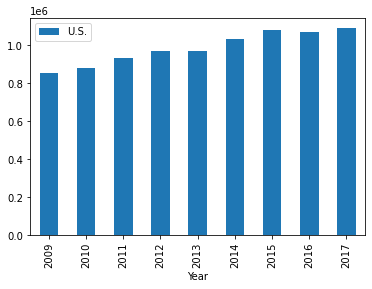

In [39]:
us_total_df = glob_gas_yr_df.filter(items=["U.S."]).plot(kind="bar")
us_total_df.set_xlabel("Year")


In [41]:
full_years = np.logical_and(glob_gas_yr_df.index >= 2009, glob_gas_yr_df.index <= 2017)
glob_gas_yr_df = glob_gas_yr_df[full_years]


Text(0.5, 0, 'Year')

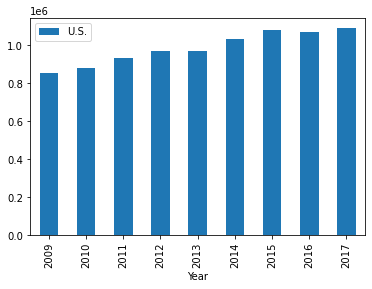

In [42]:
plot = glob_gas_yr_df.filter(items=["U.S."]).plot(kind="bar")
plot.set_xlabel("Year")

In [73]:
## State production

In [74]:
glob_gas_yr_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Gas Production')

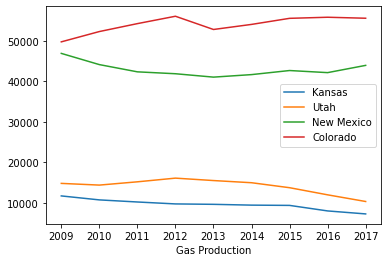

In [75]:
plot = glob_gas_yr_df.filter(items=["Kansas","Oklahama","Utah","New Mexico", "Colorado"]).plot(kind="line")
plot.set_xlabel("Gas Production")